
<center><h1><b>Image Classification: Lung and Colon Cancer Histopathological Images</b></h1></center>

---



---









# ***Introduction***

The following work presents the classification of images into 5 classes from a dataset of cancerous histopathological images of the lung and colon regions <b>(LC25000)</b> using a <b>Convolutional Neural Network (CNN)</b>. The dataset was obtained from an online platform, <b>Kaggle</b>, which provides resources for the fields of data science and machine learning, contributed by various authors (Borkowski et al., 2019, retrieved from [arXiv link](https://arxiv.org/abs/1912.12142v1)). The original dataset contains 25,000 color images, sized <b>768x768 pixels</b> and in <b>.jpeg</b> format, divided into 5 classes: <b>Lung benign tissue, Lung adenocarcinoma, Lung squamous cell carcinoma, Colon adenocarcinoma, Colon benign tissue</b>, with each class containing 5,000 images. Specifically, 3 of these classes refer to the lung region (Lung), and the remaining 2 classes refer to the colon region (Colon).
<br> <br> For this work, approximately 1,000 images per class were used, resulting in a total of 5,000 images. It is worth noting that both the number of images and the programming environment were chosen due to sufficient resources and quick execution. The selected programming environment is Google Colab (~=12GB RAM). The goal of this work is to evolve an initial model to eventually develop an ideal model for the classification of the aforementioned images.

# ***CODE***

In [ ]:
# Import from Google Drive
from google.colab import drive
drive.mount('/content/drive')
path='drive/My Drive/lung_colon_image_set1'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import necessary libraries and packages
import os
import pandas as pd  
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.models import Sequential, load_model
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,accuracy_score
from sklearn.metrics import classification_report
from tensorflow.keras import layers
from sklearn.model_selection import KFold

# **Model 1: CNN**

In [ ]:
# Define class names for the categories in the dataset
class_name = ['lung_n', 'lung_aca', 'lung_scc', 'colon_n','colon_aca']
details = ["Benign-lung", "Adenocarcinoma-lung", "Squamous Cell Carcinoma-lung", "Adenocarcinoma-colon", "Benign-colon"]
data = tf.keras.utils.image_dataset_from_directory(path, labels="inferred",label_mode="categorical",class_names=class_name,image_size=(200,200), batch_size=64, seed=123, shuffle=True)

# List all the subdirectories (which represent different classes) in the given path
lungs= os.listdir(path)
nums_lung = {}
for lung in lungs:
    nums_lung[lung] = len(os.listdir(path + '/'+lung))
img_per_class_lung = pd.DataFrame(nums_lung.values(),index=nums_lung.keys() ,columns=["Number of images"])
print()
print('Data distribution:')
print(img_per_class_lung)

Found 5019 files belonging to 5 classes.

Data distribution:
           Number of images
colon_aca              1000
lung_n                 1009
lung_scc               1009
lung_aca               1000
colon_n                1001


Max value:  255.0
Min value:  0.0



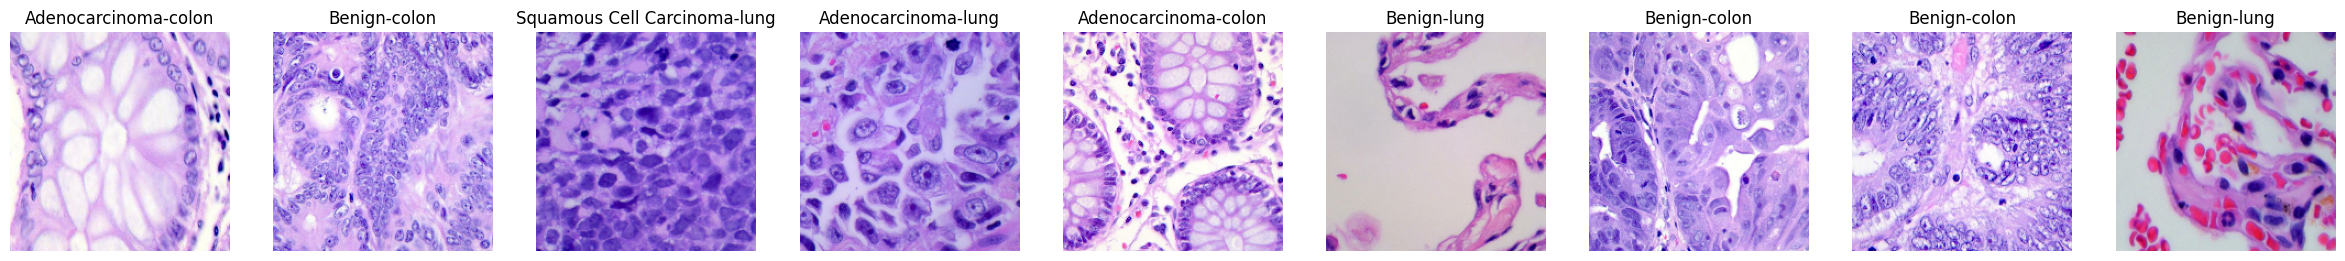

In [ ]:
# Extracts the first batch (batch=64) of data from the 'data' dataset as a numpy array
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

# Display the max and min pixel values before normalization
print('Max value: ',batch[0].max())
print('Min value: ',batch[0].min())

# Display 9 images per class before normalization
plt.figure(figsize=(30,30))
for img, labels in data.take(1):
  for i in range(9):
    plt.subplot (1,9,i+1)
    plt.imshow(img[i].numpy().astype("uint8"))
    plt.title(details[np.argmax(labels[i])])
    plt.axis("off")
print()

Max value:  1.0
Min value:  0.0



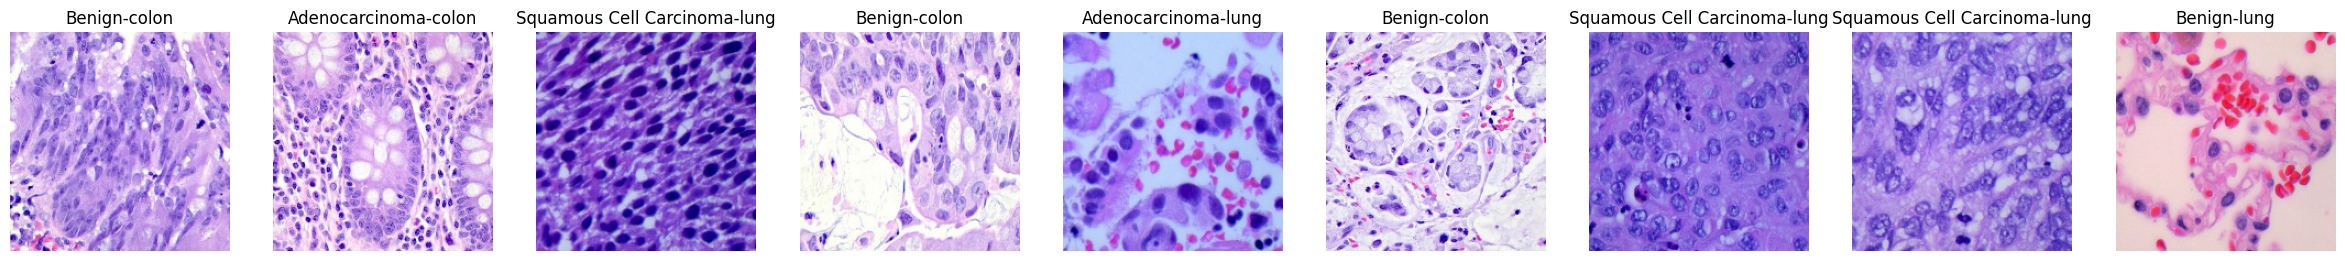

In [ ]:
# Normalization using the lambda function
data=data.map(lambda x,y: (x/255,y))
data1 = data.as_numpy_iterator().next()

# Display the max and min pixel values after normalization
print('Max value: ',data1[0].max())
print('Min value: ',data1[0].min())

# Display 9 images per class after normalization
plt.figure(figsize=(30,30))
for img, labels in data.take(1):
  for i in range(9):
    plt.subplot (1,9,i+1)
    plt.imshow(img[i])
    plt.title(details[np.argmax(labels[i])])
    plt.axis("off")
print()

In [ ]:
# Initially define the size of the subsets based on the total dataset
batch_size=64
train_size =int(len(data)*0.8)
val_size = int(len(data)*0.2)

# Then, the specified number of images is taken for each subset and the data count is printed
train_dataset = data.take(train_size)
print("Using",len(train_dataset)*batch_size , "files for training.")
val_dataset= data.skip(train_size).take(val_size)
print("Using",len(val_dataset)*batch_size , "files for validation.")

Using 4032 files for training.
Using 960 files for validation.


In [ ]:
# Create the first model
model_1 = Sequential()

In [ ]:
# Architecture of the first model
model_1.add(Conv2D(32, (3,3), activation='relu', input_shape=(200,200,3)))
model_1.add(Dropout(0.25))
model_1.add(MaxPooling2D(2,2))

model_1.add(Conv2D(64, (3,3), activation='relu'))
model_1.add(Dropout(0.25)) 
model_1.add(MaxPooling2D(2,2))

model_1.add(Conv2D(128, (3,3), activation='relu'))
model_1.add(Dropout(0.25)) 
model_1.add(MaxPooling2D(2,2))

model_1.add(Flatten())
model_1.add(Dense(256, activation='relu')) 
model_1.add(Dropout(0.5))
model_1.add(Dense(5, activation = "softmax"))

# Prepare the model for training
model_1.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 dropout (Dropout)           (None, 198, 198, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 dropout_1 (Dropout)         (None, 97, 97, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                    

In [ ]:
# Training the first model
max_epoch=10
tensorboard_callback = keras.callbacks.EarlyStopping(patience=5,min_delta=0.001,restore_best_weights=True)
hist_1 = model_1.fit(train_dataset, epochs=max_epoch, validation_data=val_dataset, callbacks=[tensorboard_callback])

Epoch 1/10
63/63 [==============================] - 1206s 19s/step - loss: 0.4551 - accuracy: 0.4846 - val_loss: 0.2888 - val_accuracy: 0.7427
Epoch 2/10
63/63 [==============================] - 613s 10s/step - loss: 0.2330 - accuracy: 0.7364 - val_loss: 0.2607 - val_accuracy: 0.7802
Epoch 3/10
63/63 [==============================] - 568s 9s/step - loss: 0.1892 - accuracy: 0.7994 - val_loss: 0.2154 - val_accuracy: 0.8521
Epoch 4/10
63/63 [==============================] - 604s 10s/step - loss: 0.1694 - accuracy: 0.8182 - val_loss: 0.2006 - val_accuracy: 0.8385
Epoch 5/10
63/63 [==============================] - 594s 9s/step - loss: 0.1344 - accuracy: 0.8740 - val_loss: 0.1619 - val_accuracy: 0.8552
Epoch 6/10
63/63 [==============================] - 589s 9s/step - loss: 0.1160 - accuracy: 0.8837 - val_loss: 0.1678 - val_accuracy: 0.8385
Epoch 7/10
63/63 [==============================] - 589s 9s/step - loss: 0.1020 - accuracy: 0.9015 - val_loss: 0.1391 - val_accuracy: 0.8833
Epoch 8/1

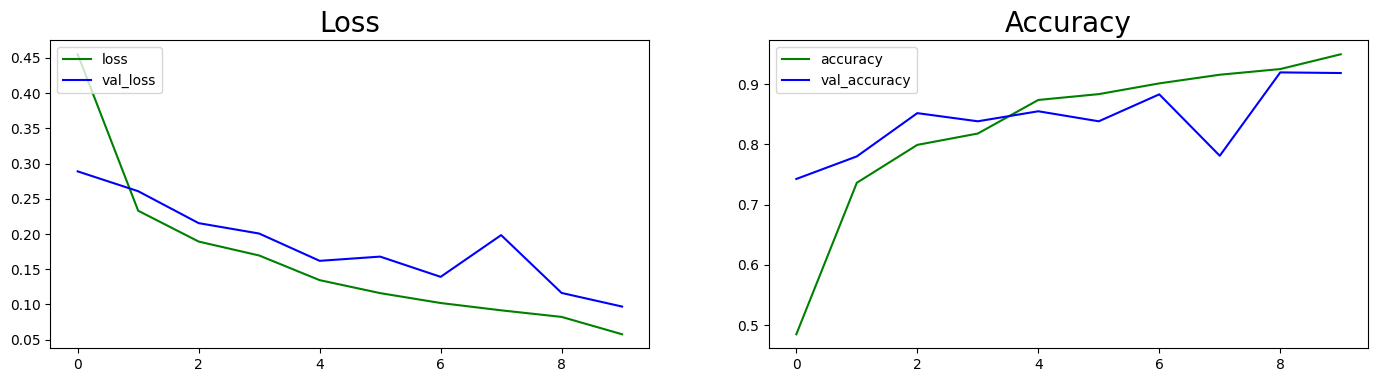

In [ ]:
# Plotting the Loss and Accuracy graphs for the first model
fig,ax= plt.subplots(1,2,figsize=(17,4))
ax[0].plot(hist_1.history['loss'], color='green', label='loss')
ax[0].plot(hist_1.history['val_loss'], color='blue', label='val_loss')
ax[0].set_title('Loss', fontsize=20)
ax[0].legend(loc="upper left")

ax[1].plot(hist_1.history['accuracy'], color='green', label='accuracy')
ax[1].plot(hist_1.history['val_accuracy'], color='blue', label='val_accuracy')
ax[1].set_title('Accuracy', fontsize=20)
ax[1].legend(loc="upper left")
plt.show()

15/15 [==============================] - 46s 2s/step
The prediction accuracy is:  0.21145833333333333

              precision    recall  f1-score   support

           0       0.22      0.23      0.22       200
           1       0.19      0.16      0.17       193
           2       0.23      0.25      0.24       209
           3       0.21      0.26      0.23       184
           4       0.19      0.16      0.17       174

    accuracy                           0.21       960
   macro avg       0.21      0.21      0.21       960
weighted avg       0.21      0.21      0.21       960



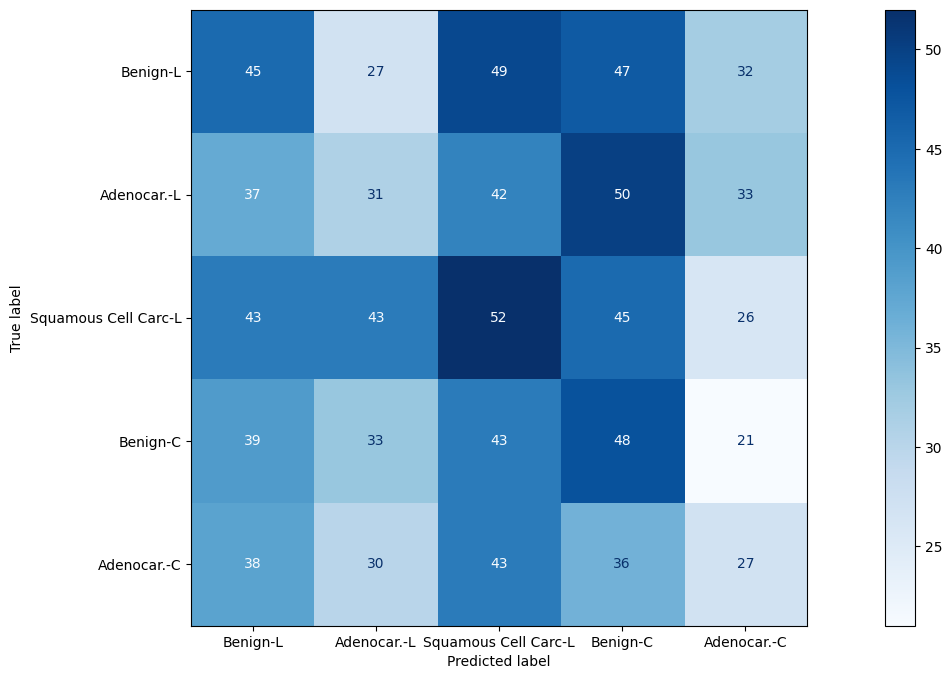

In [ ]:
# Model evaluation on the validation dataset for the first model
y_pred=model_1.predict(val_dataset).argmax(axis=1)
y_true = []
for images, labels in val_dataset:
    y_true.extend(np.argmax(labels.numpy(), axis=1))
y_true = np.array(y_true)

# Displaying performance metrics of the first model
conf_matrix=confusion_matrix(y_true, y_pred)
ac=accuracy_score(y_true, y_pred)
print("The prediction accuracy is: ", ac)
print()
print(classification_report(y_true, y_pred))

# Displaying the confusion matrix for the first model
classes= ['Benign-L', 'Adenocar.-L', 'Squamous Cell Carc-L','Benign-C','Adenocar.-C']
display_labels = [ cls for cls in classes]
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=display_labels)
fig, ax = plt.subplots(figsize=(20, 8))
cm_display.plot(include_values=True, cmap='Blues', ax=ax, xticks_rotation='horizontal')
plt.show()

# **Model 2: CNN and Data Augmentation**

In [ ]:
# Creating augmented data for the training dataset
train_gen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255,rotation_range = 20 ,horizontal_flip = True ,validation_split = 0.2)
valid_gen =  keras.preprocessing.image.ImageDataGenerator(rescale=1./255,validation_split = 0.2)

train_data = train_gen.flow_from_directory(path, subset='training', target_size=(200,200), batch_size=64, color_mode='rgb', 
                                            class_mode='categorical', shuffle=True,classes=class_name)

val_data = valid_gen.flow_from_directory(path, subset='validation', target_size=(200,200), batch_size=64, color_mode='rgb', 
                                            class_mode='categorical', shuffle=False,classes=class_name)


In [ ]:
# Additional data augmentations to be incorporated in the model architecture
data_augmentation = tf.keras.Sequential([layers.experimental.preprocessing.RandomContrast(factor=0.2, name="contrast_layer"),
                                         layers.experimental.preprocessing.RandomZoom(height_factor=(-0.1, 0.2), width_factor=(-0.1, 0.2), fill_mode="nearest", name="zoom_layer")])

In [ ]:
# Architecture of the second model
model_2 = tf.keras.models.Sequential([
                                   data_augmentation,
                                   tf.keras.layers.Conv2D(filters=32, kernel_size = 3, activation='relu'),
                                   tf.keras.layers.Dropout(0.25),
                                   tf.keras.layers.MaxPooling2D(),
                                   tf.keras.layers.Conv2D(filters =64 , kernel_size = 3,  activation = 'relu'),
                                   tf.keras.layers.Dropout(0.25),
                                   tf.keras.layers.MaxPooling2D(),
                                   tf.keras.layers.Conv2D(filters =128, kernel_size = 3, activation = 'relu'),
                                   tf.keras.layers.Dropout(0.25),
                                   tf.keras.layers.MaxPooling2D(),
                                   tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(units=256, activation = 'relu'),
                                   tf.keras.layers.Dropout(0.5),
                                   tf.keras.layers.Dense(units = 5, activation='softmax')])
model_2.build(input_shape=(None, 200, 200, 3))
model_2.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 200, 200, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 198, 198, 32)      896       
                                                                 
 dropout_4 (Dropout)         (None, 198, 198, 32)      0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 99, 99, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 dropout_5 (Dropout)         (None, 97, 97, 64)        0         
                                                      

In [ ]:
# Training the second model
max_epoch=10
tensorboard_callback = keras.callbacks.EarlyStopping(patience=5,min_delta=0.001,restore_best_weights=True)
hist_2 = model_2.fit(train_data, epochs=max_epoch, validation_data=val_data, callbacks=[tensorboard_callback])

Epoch 1/10
63/63 [==============================] - 667s 10s/step - loss: 0.2470 - accuracy: 0.6933 - val_loss: 0.2584 - val_accuracy: 0.7275
Epoch 2/10
63/63 [==============================] - 633s 10s/step - loss: 0.2233 - accuracy: 0.7493 - val_loss: 0.2258 - val_accuracy: 0.7894
Epoch 3/10
63/63 [==============================] - 629s 10s/step - loss: 0.1964 - accuracy: 0.7939 - val_loss: 0.2350 - val_accuracy: 0.8353
Epoch 4/10
63/63 [==============================] - 630s 10s/step - loss: 0.1785 - accuracy: 0.8140 - val_loss: 0.2031 - val_accuracy: 0.8044
Epoch 5/10
63/63 [==============================] - 632s 10s/step - loss: 0.1574 - accuracy: 0.8397 - val_loss: 0.1652 - val_accuracy: 0.8802
Epoch 6/10
63/63 [==============================] - 633s 10s/step - loss: 0.1650 - accuracy: 0.8262 - val_loss: 0.1525 - val_accuracy: 0.8762
Epoch 7/10
63/63 [==============================] - 629s 10s/step - loss: 0.1447 - accuracy: 0.8579 - val_loss: 0.1713 - val_accuracy: 0.8523
Epoch 

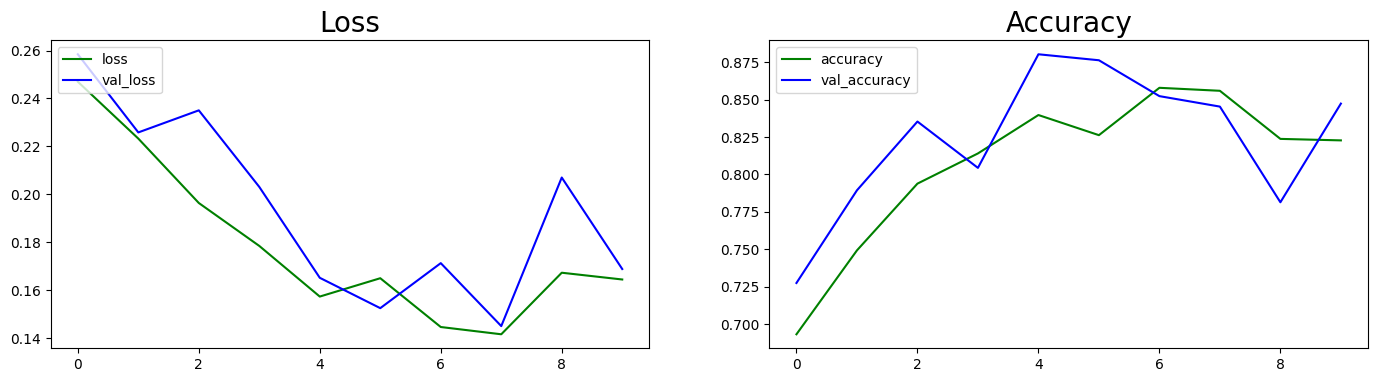

In [ ]:
# Plotting the Loss and Accuracy graphs for the second model
fig,ax= plt.subplots(1,2,figsize=(17,4))
ax[0].plot(hist_2.history['loss'], color='green', label='loss')
ax[0].plot(hist_2.history['val_loss'], color='blue', label='val_loss')
ax[0].set_title('Loss', fontsize=20)
ax[0].legend(loc="upper left")

ax[1].plot(hist_2.history['accuracy'], color='green', label='accuracy')
ax[1].plot(hist_2.history['val_accuracy'], color='blue', label='val_accuracy')
ax[1].set_title('Accuracy', fontsize=20)
ax[1].legend(loc="upper left")
plt.show()

In [ ]:
# Model evaluation
loss,accuracy= model_2.evaluate(val_data)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

16/16 [==============================] - 35s 2s/step - loss: 0.1689 - accuracy: 0.8473
Test loss: 0.1688624620437622
Test accuracy: 0.847305417060852


16/16 [==============================] - 41s 2s/step
The prediction accuracy is:  0.8473053892215568

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       201
           1       0.92      0.69      0.79       200
           2       0.82      0.90      0.86       201
           3       0.87      0.79      0.83       200
           4       0.72      0.86      0.79       200

    accuracy                           0.85      1002
   macro avg       0.86      0.85      0.85      1002
weighted avg       0.86      0.85      0.85      1002



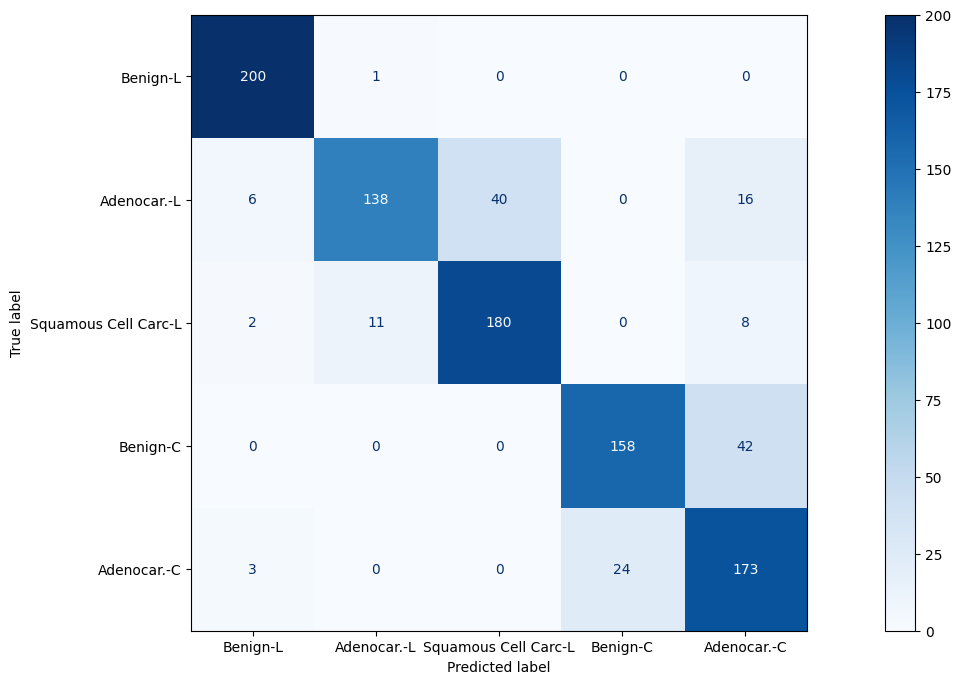

In [ ]:
# Predicting the labels for the validation dataset
y_pred=model_2.predict(val_data).argmax(axis=1)
y_true = val_data.classes

# Displaying performance metrics for model 2
conf_matrix=confusion_matrix(y_true, y_pred)
ac=accuracy_score(y_true, y_pred)
print("The prediction accuracy is: ", ac)
print()
print(classification_report(y_true, y_pred))

# Displaying the confusion matrix of model 2
classes= ['Benign-L', 'Adenocar.-L', 'Squamous Cell Carc-L','Benign-C','Adenocar.-C']
display_labels = [ cls for cls in classes]
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=display_labels)
fig, ax = plt.subplots(figsize=(20,8))
cm_display.plot(include_values=True, cmap='Blues', ax=ax, xticks_rotation='horizontal')
plt.show()

# **Model 3: CNN with Data Augmentation and K-Folds Cross Validation**

In [ ]:
# Model 3 creation, using model 2 as the base
model_3 = model_2

Fold: 1

Epoch 1/10
63/63 [==============================] - 628s 10s/step - loss: 0.1490 - accuracy: 0.8514 - val_loss: 0.1285 - val_accuracy: 0.8962
Epoch 2/10
63/63 [==============================] - 624s 10s/step - loss: 0.1238 - accuracy: 0.8770 - val_loss: 0.1225 - val_accuracy: 0.9112
Epoch 3/10
63/63 [==============================] - 625s 10s/step - loss: 0.1085 - accuracy: 0.8920 - val_loss: 0.1278 - val_accuracy: 0.8563
Epoch 4/10
63/63 [==============================] - 624s 10s/step - loss: 0.1086 - accuracy: 0.8992 - val_loss: 0.1567 - val_accuracy: 0.8553
Epoch 5/10
63/63 [==============================] - 617s 10s/step - loss: 0.1164 - accuracy: 0.8942 - val_loss: 0.1209 - val_accuracy: 0.8832
Epoch 6/10
63/63 [==============================] - 620s 10s/step - loss: 0.0974 - accuracy: 0.9034 - val_loss: 0.1161 - val_accuracy: 0.9072
Epoch 7/10
63/63 [==============================] - 623s 10s/step - loss: 0.0944 - accuracy: 0.9124 - val_loss: 0.1366 - val_accuracy: 0.85

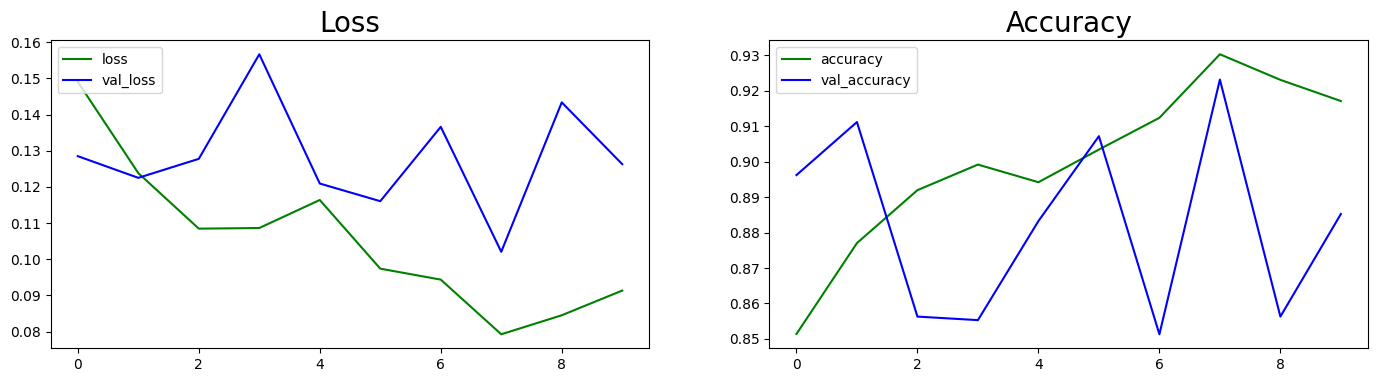

16/16 [==============================] - 36s 2s/step - loss: 0.1263 - accuracy: 0.8852
Test loss: 0.12628844380378723
Test accuracy: 0.8852295279502869
16/16 [==============================] - 34s 2s/step
The prediction accuracy is:  0.8852295409181636

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       201
           1       0.92      0.81      0.86       200
           2       0.86      0.93      0.89       201
           3       0.97      0.73      0.84       200
           4       0.76      0.97      0.85       200

    accuracy                           0.89      1002
   macro avg       0.90      0.89      0.88      1002
weighted avg       0.90      0.89      0.88      1002



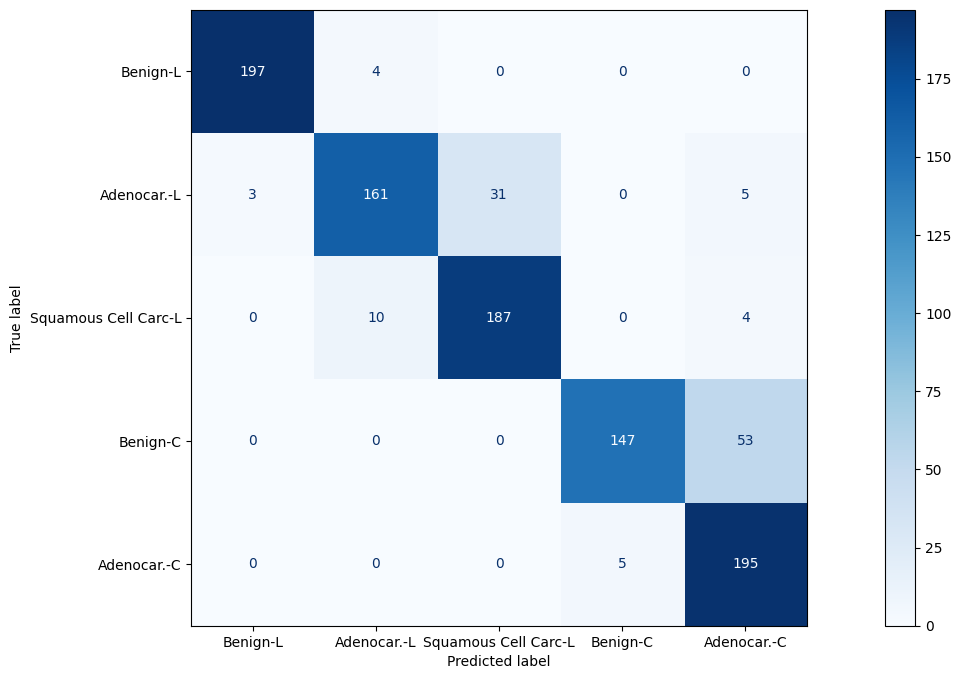

Fold: 2

Epoch 1/10
63/63 [==============================] - 614s 10s/step - loss: 0.0875 - accuracy: 0.9134 - val_loss: 0.1043 - val_accuracy: 0.9102
Epoch 2/10
63/63 [==============================] - 610s 10s/step - loss: 0.0686 - accuracy: 0.9355 - val_loss: 0.1749 - val_accuracy: 0.8283
Epoch 3/10
63/63 [==============================] - 614s 10s/step - loss: 0.0636 - accuracy: 0.9373 - val_loss: 0.0933 - val_accuracy: 0.9222
Epoch 4/10
63/63 [==============================] - 611s 10s/step - loss: 0.0782 - accuracy: 0.9246 - val_loss: 0.0961 - val_accuracy: 0.9122
Epoch 5/10
63/63 [==============================] - 607s 10s/step - loss: 0.0649 - accuracy: 0.9432 - val_loss: 0.1658 - val_accuracy: 0.8423
Epoch 6/10
63/63 [==============================] - 609s 10s/step - loss: 0.0735 - accuracy: 0.9315 - val_loss: 0.0930 - val_accuracy: 0.9251
Epoch 7/10
63/63 [==============================] - 611s 10s/step - loss: 0.0681 - accuracy: 0.9395 - val_loss: 0.0944 - val_accuracy: 0.89

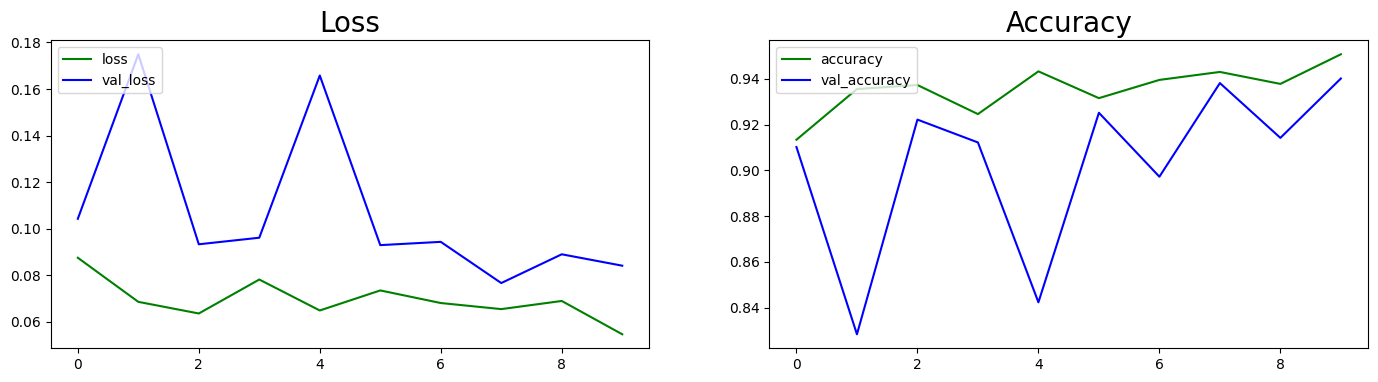

16/16 [==============================] - 37s 2s/step - loss: 0.0841 - accuracy: 0.9401
Test loss: 0.08413080871105194
Test accuracy: 0.940119743347168
16/16 [==============================] - 34s 2s/step
The prediction accuracy is:  0.9401197604790419

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       201
           1       0.93      0.84      0.88       200
           2       0.86      0.95      0.90       201
           3       0.96      0.98      0.97       200
           4       0.98      0.94      0.96       200

    accuracy                           0.94      1002
   macro avg       0.94      0.94      0.94      1002
weighted avg       0.94      0.94      0.94      1002



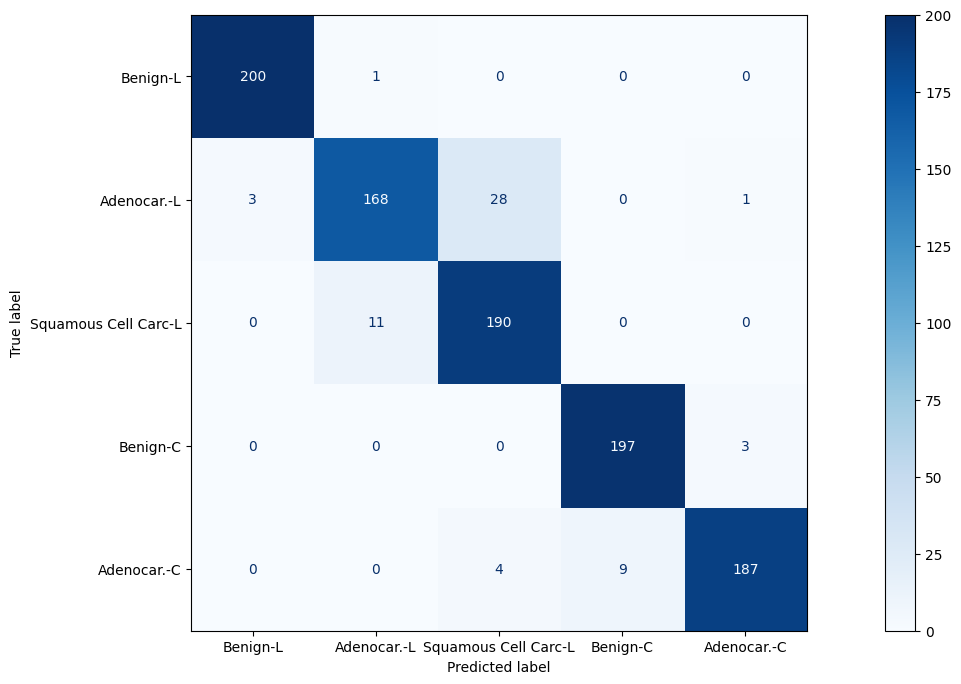

In [ ]:
num_folds = 2
max_epoch = 10

# Initialize KFold object with specified number of splits
kfold = KFold(n_splits=num_folds, shuffle=True)

conf_matrix_sum = np.zeros((len(class_name), len(class_name)))
all_scores = []
# Loop through each fold
for fold, (train_indexes, val_indexes) in enumerate(kfold.split(train_data)):
    print("Fold:", fold+1)
    print()

    # Compile the model for training
    model_3.compile('adam', loss='binary_crossentropy',metrics=['accuracy'])
  
    # Train the model for the current fold
    tensorboard_callback = keras.callbacks.EarlyStopping(patience=5,min_delta=0.001,restore_best_weights=True)
    hist_3 = model_3.fit(train_data, epochs=max_epoch, validation_data=val_data, callbacks=[tensorboard_callback]) 

    # Plot the Loss and Accuracy graphs for the current fold
    fig,ax= plt.subplots(1,2,figsize=(17,4))
    ax[0].plot(hist_3.history['loss'], color='green', label='loss')
    ax[0].plot(hist_3.history['val_loss'], color='blue', label='val_loss')
    ax[0].set_title('Loss', fontsize=20)
    ax[0].legend(loc="upper left")

    ax[1].plot(hist_3.history['accuracy'], color='green', label='accuracy')
    ax[1].plot(hist_3.history['val_accuracy'], color='blue', label='val_accuracy')
    ax[1].set_title('Accuracy', fontsize=20)
    ax[1].legend(loc="upper left")
    plt.show()

    # Model evaluation for the current fold
    loss,accuracy= model_3.evaluate(val_data)
    print('Test loss:', loss)
    print('Test accuracy:', accuracy)
    all_scores.append(accuracy)

    y_pred=model_3.predict(val_data).argmax(axis=1)
    y_true = val_data.classes
    conf_matrix=confusion_matrix(y_true, y_pred)
    conf_matrix_sum += conf_matrix

    ac=accuracy_score(y_true, y_pred)
    print("The prediction accuracy is: ", ac)
    print()
    print(classification_report(y_true, y_pred))

    # Display the confusion matrix for the current fold
    classes= ['Benign-L', 'Adenocar.-L', 'Squamous Cell Carc-L','Benign-C', 'Adenocar.-C']
    display_labels = [ cls for cls in classes]
    cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=display_labels)
    fig, ax = plt.subplots(figsize=(20, 8))
    cm_display.plot(include_values=True, cmap='Blues', ax=ax, xticks_rotation='horizontal')
    plt.show()

In [ ]:
# Calculate the mean accuracy from all folds in K-fold cross-validation
mean_accuracy = np.mean(all_scores)
print('Mean accuracy: {:.2f}%'.format(mean_accuracy*100))

Mean accuracy: 91.27%
